In [1]:
import pandas as pd 
import yfinance as yf
import plotly.express as px 
import matplotlib.pyplot as plt 
import datetime as dt
import sqlite3
import sqlalchemy
import os

/var/folders/tz/k1k21d6x7j1d90h0t6dqf5yc0000gn/T/ipykernel_46251/1027016788.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
db_data_path = r'/Users/pankajti/dev/git/wqu/capstone/data/db/capstone.db'
con = sqlite3.connect(db_data_path)
dbEngine = sqlalchemy.create_engine(f'sqlite:///{db_data_path}')


prices = pd.read_sql("select * from market_data",dbEngine)

In [4]:
prices.shape

(5318790, 9)

In [5]:
prices.head()

,timestamp,Open,High,Low,Close,Adj Close,Volume,ticker,date
0,2024-03-26 09:15:00+05:30,2898.449951,2903.899902,2898.449951,2903.899902,2903.899902,0.0,RELIANCE.NS,2024-03-26
1,2024-03-26 09:16:00+05:30,2903.300049,2903.300049,2898.750000,2900.600098,2900.600098,101095.0,RELIANCE.NS,2024-03-26
2,2024-03-26 09:17:00+05:30,2901.350098,2901.350098,2894.550049,2894.550049,2894.550049,61865.0,RELIANCE.NS,2024-03-26
3,2024-03-26 09:18:00+05:30,2894.800049,2900.949951,2894.800049,2896.899902,2896.899902,63076.0,RELIANCE.NS,2024-03-26
4,2024-03-26 09:19:00+05:30,2898.250000,2898.350098,2894.100098,2894.600098,2894.600098,25784.0,RELIANCE.NS,2024-03-26


In [8]:
prices.groupby(['ticker','date']).count()['Close'].reset_index()

,ticker,date,Close
0,20MICRONS.NS,2024-03-26,196
1,20MICRONS.NS,2024-03-27,172
2,20MICRONS.NS,2024-03-28,176
3,20MICRONS.NS,2024-04-01,186
4,20MICRONS.NS,2024-04-02,333
...,...,...,...
21158,ZYDUSWELL.NS,2024-04-10,277
21159,ZYDUSWELL.NS,2024-04-12,292
21160,ZYDUSWELL.NS,2024-04-15,285
21161,ZYDUSWELL.NS,2024-04-16,306


In [13]:
prices['range'] = 100*((prices.High - prices.Low)/prices.Low)

In [67]:
records = [] 
for idx, df in prices.groupby(['ticker','date']):
    df = df.set_index(pd.to_datetime(df['timestamp']))
    #print(idx)
    #print(df.range.plot())
    ohlc_rec = df.Close.resample('1d').ohlc()
    ohlc_rec['ticker'] = idx[0]
    ohlc_rec['date'] = idx[1]
    records.append(ohlc_rec)
    #print(ohlc_rec
    

In [35]:
daily_rec = pd.concat(records)

In [36]:
daily_rec.shape

(21163, 6)

In [43]:
daily_rec['range']=100*((daily_rec.high-daily_rec.low)/daily_rec.low)

In [58]:
max_gainers = daily_rec[daily_rec.range>20].sort_values('range', ascending=False)

In [59]:
max_gainers= max_gainers[max_gainers.range<100]

In [60]:
max_gainers = max_gainers[['ticker', 'date','range']]

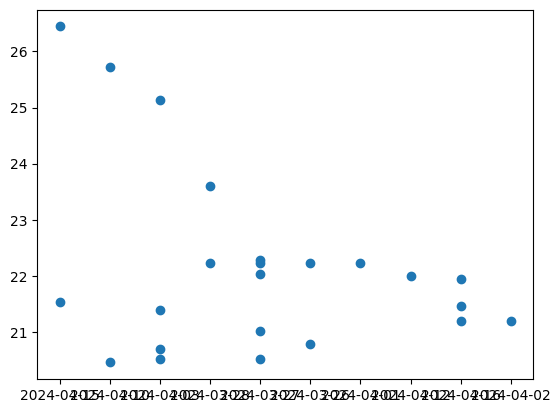

In [68]:
plt.scatter(max_gainers.date, max_gainers.range)

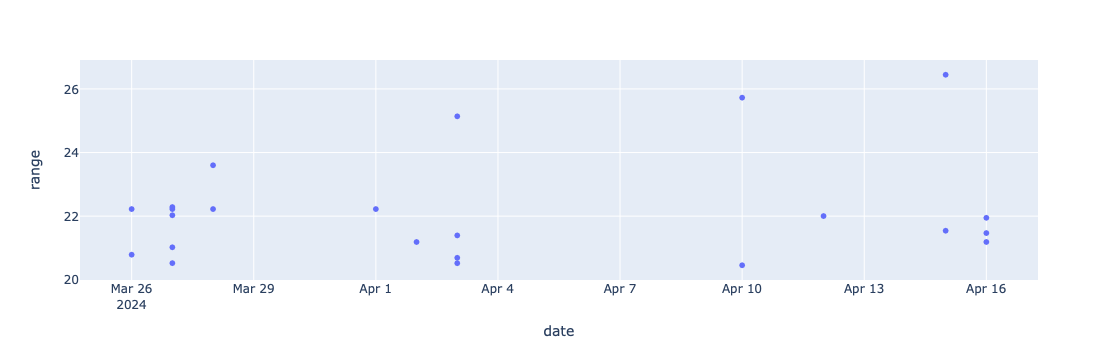

In [63]:
px.scatter(max_gainers.sort_values('date'), y='range', x= 'date')

In [62]:
max_gainers.sort_values('date')

,ticker,date,range
timestamp,,,
2024-03-26 00:00:00+05:30,HITECHGEAR.NS,2024-03-26,20.787402
2024-03-26 00:00:00+05:30,EXCEL.NS,2024-03-26,22.222228
2024-03-27 00:00:00+05:30,NIITMTS.NS,2024-03-27,21.020454
2024-03-27 00:00:00+05:30,OSWALSEEDS.NS,2024-03-27,20.521744
2024-03-27 00:00:00+05:30,PFIZER.NS,2024-03-27,22.285266
2024-03-27 00:00:00+05:30,EXCEL.NS,2024-03-27,22.222228
2024-03-27 00:00:00+05:30,AGRITECH.NS,2024-03-27,22.027675
2024-03-28 00:00:00+05:30,HEADSUP.NS,2024-03-28,23.599998
2024-03-28 00:00:00+05:30,EXCEL.NS,2024-03-28,22.222228


In [64]:
max_gainers.ticker

timestamp
2024-04-15 00:00:00+05:30         RITCO.NS
2024-04-10 00:00:00+05:30      RELINFRA.NS
2024-04-03 00:00:00+05:30           BIL.NS
2024-03-28 00:00:00+05:30       HEADSUP.NS
2024-03-27 00:00:00+05:30        PFIZER.NS
2024-03-26 00:00:00+05:30         EXCEL.NS
2024-03-27 00:00:00+05:30         EXCEL.NS
2024-03-28 00:00:00+05:30         EXCEL.NS
2024-04-01 00:00:00+05:30         EXCEL.NS
2024-03-27 00:00:00+05:30      AGRITECH.NS
2024-04-12 00:00:00+05:30         LEXUS.NS
2024-04-16 00:00:00+05:30         URAVI.NS
2024-04-15 00:00:00+05:30           PAR.NS
2024-04-16 00:00:00+05:30       AAATECH.NS
2024-04-03 00:00:00+05:30      AGROPHOS.NS
2024-04-16 00:00:00+05:30          DSSL.NS
2024-04-02 00:00:00+05:30     SECURCRED.NS
2024-03-27 00:00:00+05:30       NIITMTS.NS
2024-03-26 00:00:00+05:30    HITECHGEAR.NS
2024-04-03 00:00:00+05:30      INDOAMIN.NS
2024-03-27 00:00:00+05:30    OSWALSEEDS.NS
2024-04-03 00:00:00+05:30      RELCHEMQ.NS
2024-04-10 00:00:00+05:30    GANGESSECU.NS
N

In [66]:
prices[prices.ticker=='EXCEL.NS']

,timestamp,Open,High,Low,Close,Adj Close,Volume,ticker,date,range
1463284,2024-03-26 09:15:00+05:30,0.55,0.55,0.50,0.55,0.55,0.0,EXCEL.NS,2024-03-26,10.000002
1463285,2024-03-26 09:16:00+05:30,0.50,0.55,0.50,0.55,0.55,77764.0,EXCEL.NS,2024-03-26,10.000002
1463286,2024-03-26 09:17:00+05:30,0.55,0.55,0.50,0.50,0.50,40419.0,EXCEL.NS,2024-03-26,10.000002
1463287,2024-03-26 09:18:00+05:30,0.50,0.55,0.50,0.50,0.50,24007.0,EXCEL.NS,2024-03-26,10.000002
1463288,2024-03-26 09:19:00+05:30,0.55,0.55,0.50,0.55,0.55,46681.0,EXCEL.NS,2024-03-26,10.000002
...,...,...,...,...,...,...,...,...,...,...
5307134,2024-04-18 15:25:00+05:30,0.55,0.55,0.55,0.55,0.55,122.0,EXCEL.NS,2024-04-18,0.000000
5307135,2024-04-18 15:26:00+05:30,0.50,0.55,0.50,0.55,0.55,575.0,EXCEL.NS,2024-04-18,10.000002
5307136,2024-04-18 15:27:00+05:30,0.55,0.55,0.50,0.55,0.55,13258.0,EXCEL.NS,2024-04-18,10.000002
5307137,2024-04-18 15:28:00+05:30,0.50,0.55,0.50,0.55,0.55,9931.0,EXCEL.NS,2024-04-18,10.000002
